## Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc

## Read File

In [8]:
df = pd.read_csv('bank.csv')

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data Pre-Processing

In [10]:
res_df = df.copy()
res_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [1]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

#get_dummies (read documentation , train and test dataset)

In [11]:
preprocessor(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [12]:
encoded_df = preprocessor(df)
encoded_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


#### Separating x and y

In [16]:
x = encoded_df.drop('deposit',axis=1).values
x

array([[ 59,   0,   1, ...,  -1,   0,   3],
       [ 56,   0,   1, ...,  -1,   0,   3],
       [ 41,   9,   1, ...,  -1,   0,   3],
       ...,
       [ 32,   9,   2, ...,  -1,   0,   3],
       [ 43,   9,   1, ..., 172,   5,   0],
       [ 34,   9,   1, ...,  -1,   0,   3]], dtype=int64)

In [17]:
x = encoded_df.drop('deposit',axis=1).values     #creating the independent variables
y = encoded_df['deposit'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=5)

In [18]:
x

array([[ 59,   0,   1, ...,  -1,   0,   3],
       [ 56,   0,   1, ...,  -1,   0,   3],
       [ 41,   9,   1, ...,  -1,   0,   3],
       ...,
       [ 32,   9,   2, ...,  -1,   0,   3],
       [ 43,   9,   1, ..., 172,   5,   0],
       [ 34,   9,   1, ...,  -1,   0,   3]], dtype=int64)

In [19]:
x_train

array([[37,  4,  1, ..., -1,  0,  3],
       [45,  0,  1, ..., -1,  0,  3],
       [52,  0,  1, ..., -1,  0,  3],
       ...,
       [25,  8,  2, ..., 94,  6,  1],
       [27,  7,  2, ..., -1,  0,  3],
       [31,  4,  2, ..., 93,  6,  2]], dtype=int64)

In [20]:
x_test.shape

(2233, 16)

### Decision Tree with Cart(Gini)

###### Decision Tree with depth 4

In [21]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(x_train,y_train)

y_pred_4 = model_dt_4.predict(x_test)
accuracy_score_4 = accuracy_score(y_test,y_pred_4)
print('Accuracy Score for model with depth 4 is: ',accuracy_score_4)

Accuracy Score for model with depth 4 is:  0.7913121361397224


###### Decision Tree with depth 6

In [22]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)
model_dt_6.fit(x_train,y_train)

y_pred_6 = model_dt_6.predict(x_test)
accuracy_score_6 = accuracy_score(y_test,y_pred_6)
print('Accuracy Score for model with depth 6 is: ',accuracy_score_6)


Accuracy Score for model with depth 6 is:  0.8083296014330497


###### Decision Tree with depth 8

In [23]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt_8.fit(x_train,y_train)

y_pred_8 = model_dt_8.predict(x_test)
accuracy_score_8 = accuracy_score(y_test,y_pred_8)
print('Accuracy Score for model with depth 8 is: ',accuracy_score_8)

Accuracy Score for model with depth 8 is:  0.8172861621137483


### Decision Tree with c4.5(entropy)

In [24]:
model_dt_ent = DecisionTreeClassifier(max_depth=8,criterion='entropy')
model_dt_ent.fit(x_train,y_train)

y_pred_ent = model_dt_ent.predict(x_test)

accuracy_score_4 = accuracy_score(y_test,y_pred_ent)
print('Accuracy Score for model with depth 4 is: ',accuracy_score_4)

Accuracy Score for model with depth 4 is:  0.812807881773399


### Classification Report

In [25]:
print(classification_report(y_test,y_pred_8))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1170
           1       0.79      0.84      0.81      1063

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



## Area Under the Curve

In [26]:
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_8)    #y_pred_proba
roc_auc_dt = auc(fpr_dt,tpr_dt)
print(accuracy_score(y_test,y_pred_8))

0.8172861621137483


In [29]:
print(fpr_dt,tpr_dt,_)

[0.        0.2025641 1.       ] [0.         0.83913452 1.        ] [2 1 0]


In [27]:
print(roc_auc_dt)

0.8182852111826712


## Graphical Represetation of Tree

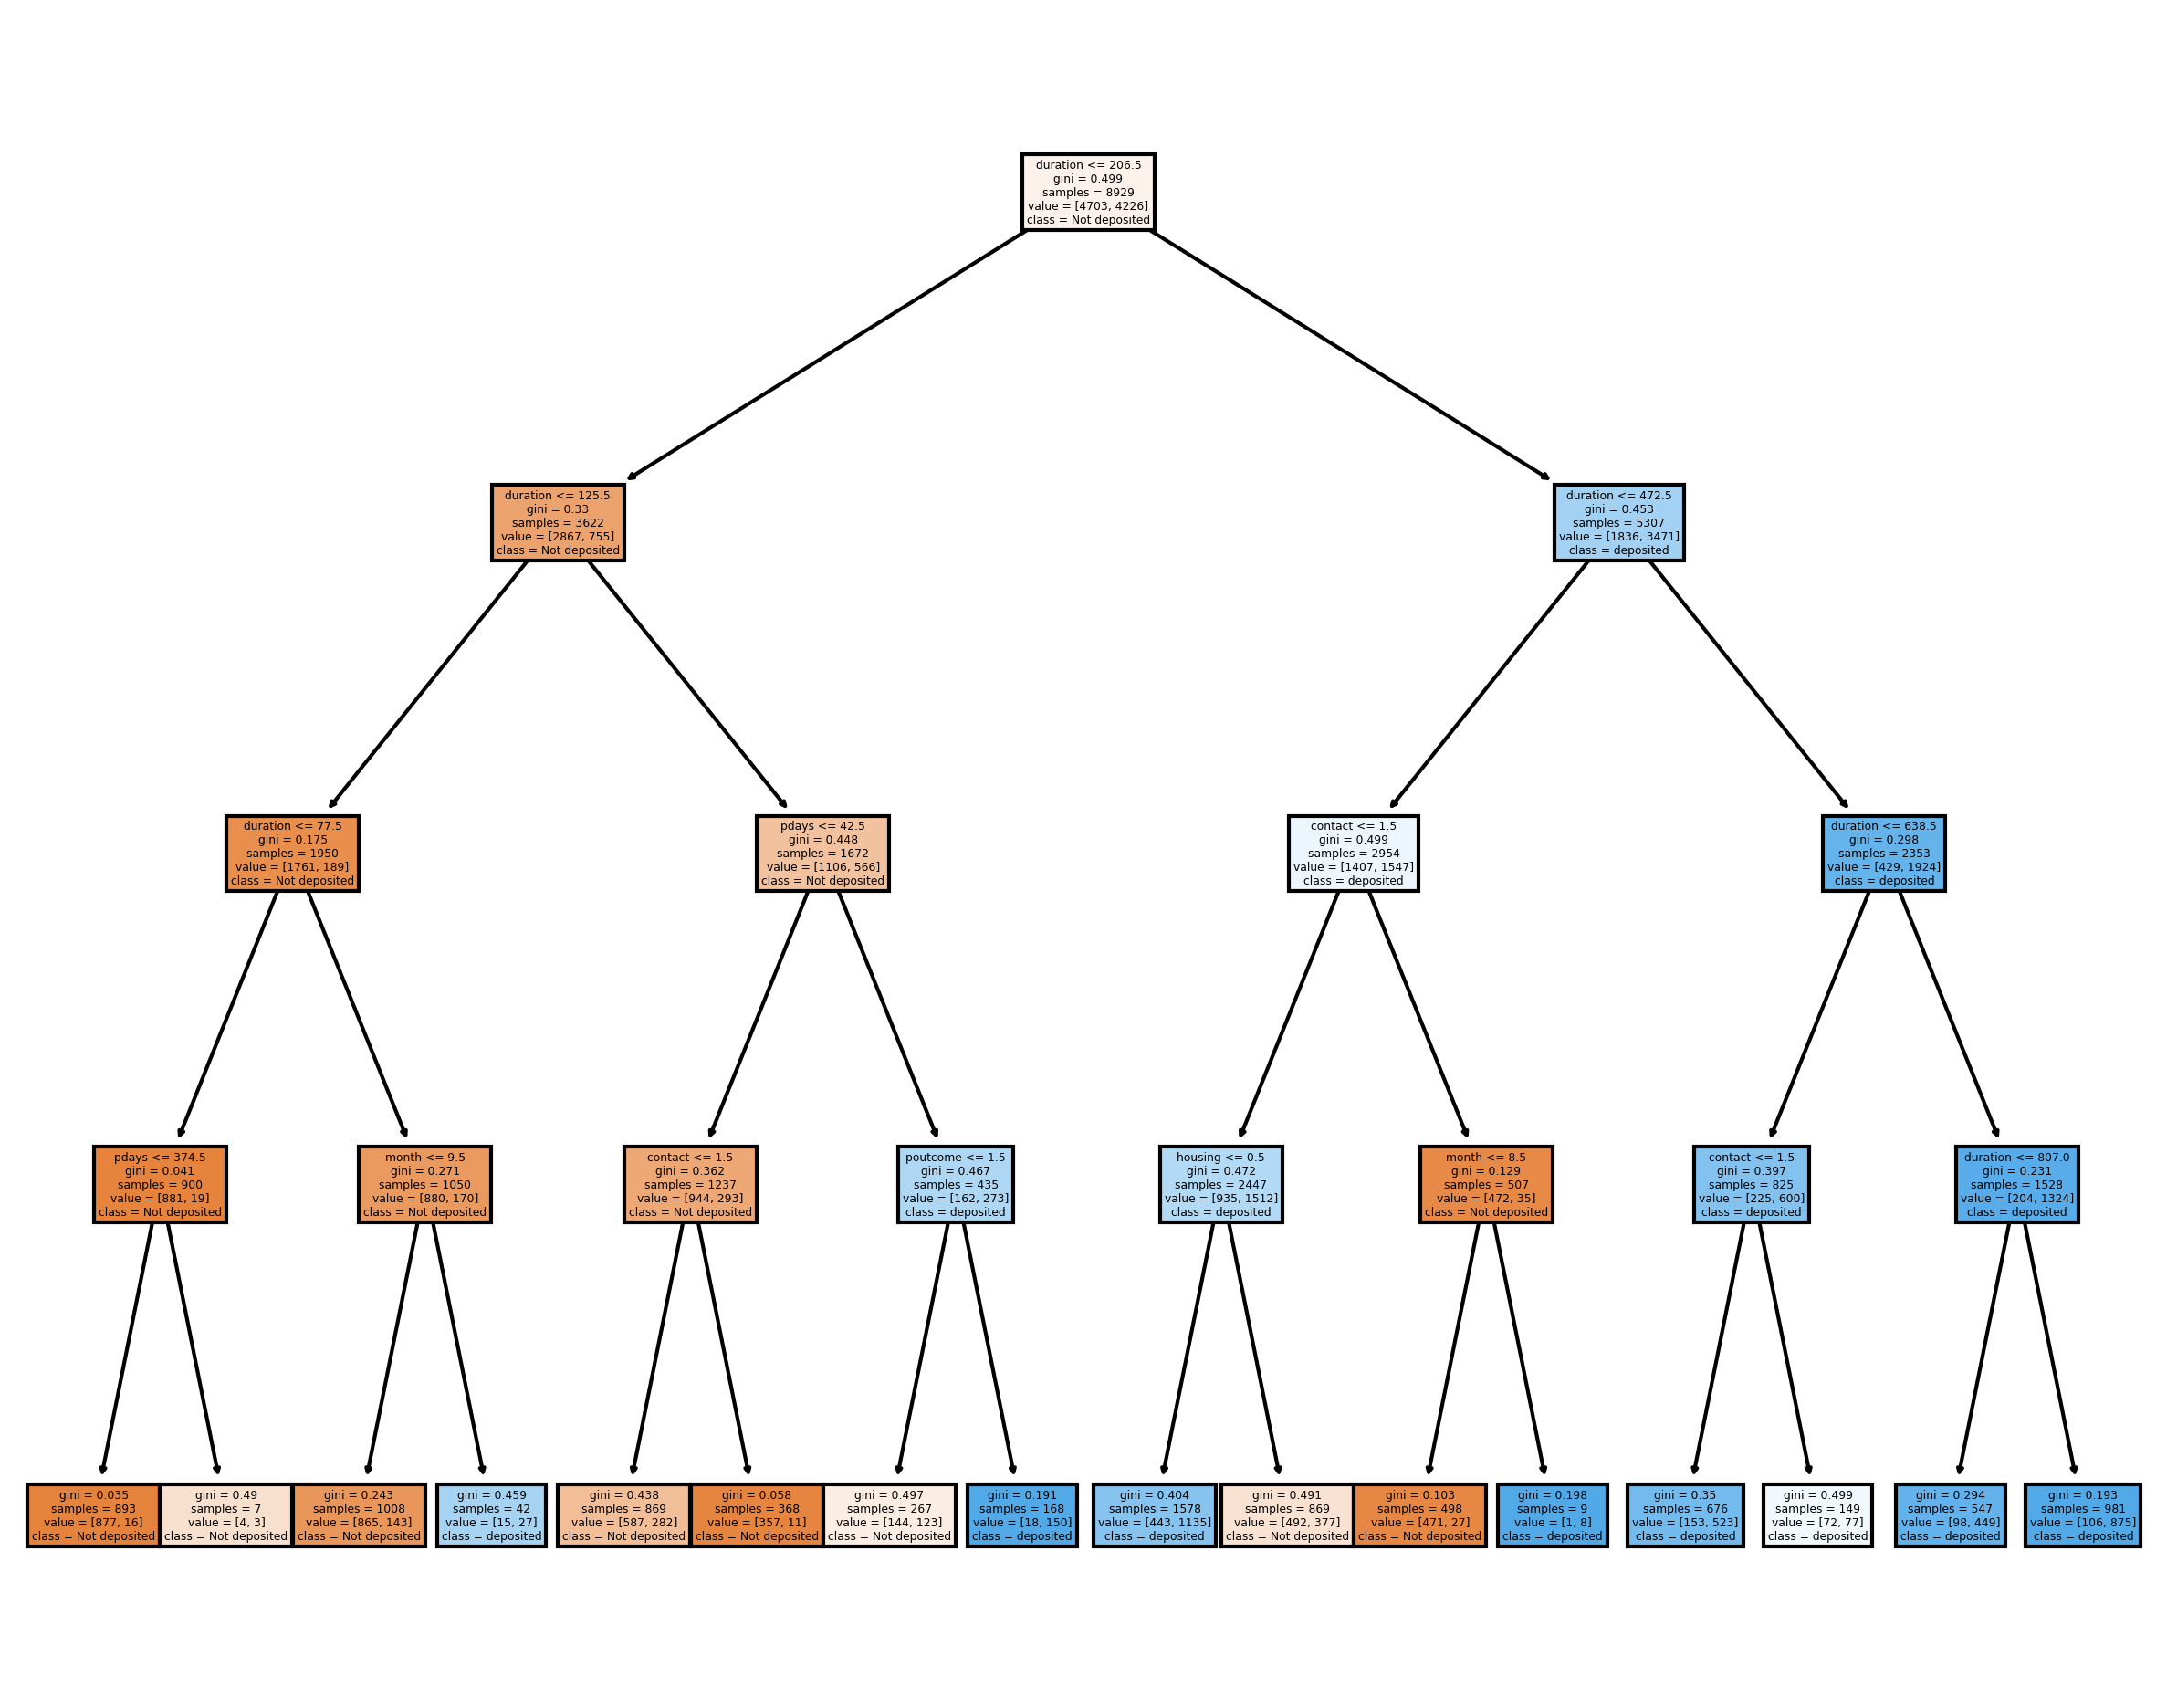

In [16]:
from sklearn import tree
df1=pd.DataFrame(df.drop(['deposit'],axis=1))
column_names=list(df1.columns)
fn=column_names
cn=['Not deposited','deposited']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)

tree.plot_tree(model_dt_4,
           feature_names = fn, 
           class_names=cn,
           filled = True);

fig.savefig('DecisionTreeComplete.png')